<a href="https://colab.research.google.com/github/IlonaGA/hw_ribo-seq/blob/main/HW_Ribo_seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 Patched (2022-11-10
  r83330)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘bitops’, ‘formatR’, ‘plogr’, ‘png’, ‘Biostrings’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘lambda.r’, ‘futile.options’, ‘XML’, ‘xtable’, ‘RSQLite’, ‘KEGGREST’, ‘GenomeInfoDb’, ‘XVector’, ‘MatrixGenerics’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘annotate’, ‘AnnotationDbi’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘matrixStats’, ‘locfit’, ‘geneplotter’, ‘Rcpp’, ‘RcppArmadillo’


Old packages: 'bit', 'data.table', 'devtools', 'gert', 'htmltools', 'jsonlite',
  'knitr', 'openssl', 'pkgload', 'sass', 'stringr', 'tidyverse', 'vctrs',
  'whisker', 'xfun', 'boot', 'foreign'



In [ ]:
library("DESeq2")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: M

In [1]:
data <- read.csv(file = '01. RiboSeq_RNASeq_HCC_counts.tsv', sep='\t')
head(data)

,geneID,geneSymbol,LC001.normal.RPF,LC001.tumor.RPF,LC001.normal.RNA,LC001.tumor.RNA,LC033.normal.RPF,LC033.tumor.RPF,LC033.normal.RNA,LC033.tumor.RNA,⋯,LC507.normal.RNA,LC507.tumor.RNA,LC508.normal.RPF,LC508.tumor.RPF,LC508.normal.RNA,LC508.tumor.RNA,LC509.normal.RPF,LC509.tumor.RPF,LC509.normal.RNA,LC509.tumor.RNA
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSG00000000003.14,TSPAN6,0,0,402,873,0,0,301,1627,⋯,218,457,0,0,200,889,0,0,161,857
2,ENSG00000000005.5,TNMD,0,0,0,1,0,0,0,1,⋯,0,0,1,0,0,0,0,0,0,NA
3,ENSG00000000419.12,DPM1,168,239,88,187,114,439,66,201,⋯,92,170,109,357,60,244,141,173,56,83
4,ENSG00000000457.13,SCYL3,65,121,60,106,36,163,70,156,⋯,127,176,67,176,55,261,64,100,68,176
5,ENSG00000000460.16,C1orf112,8,43,18,70,16,76,4,63,⋯,124,437,7,167,34,201,6,61,9,58
6,ENSG00000000938.12,FGR,0,6,19,9,14,13,61,24,⋯,94,13,3,9,42,26,7,10,26,57


In [36]:
cors = list()
cors

list()

In [37]:
data_labels <- data[,1:2]
data_num <- data.frame(sapply(data[,3:ncol(data)], function(x) as.numeric(as.character(x))))

In [38]:
data_num[is.na(data_num)] <- 0
#summ_RNA <- sum(data_num[, grepl('RNA',names(data_num))])
#summ_RPF <- sum(data_num[, grepl('RPF',names(data_num))])
data_num[, grepl('RNA',names(data_num))] <- data_num[, grepl('RNA',names(data_num))]# * 1000000 / summ_RNA
data_num[, grepl('RPF',names(data_num))] <- data_num[, grepl('RPF',names(data_num))]# * 1000000 / summ_RPF
data <- cbind(data_labels, data_num)

Посчитаем коррелляцию Спирмена, так как зависимость может быть не линейной

In [39]:
for(i in 1:nrow(data)) {
    result = cor(as.numeric(data[i, grepl('RNA',names(data))]), as.numeric(data[i, grepl('RPF',names(data))]), method = "spearman")
    cors <- append(cors, result)
    #cat(data$geneSymbol[i], result, "\n")
}

Warning message in cor(as.numeric(data[i, grepl("RNA", names(data))]), as.numeric(data[i, :
“the standard deviation is zero”
Warning message in cor(as.numeric(data[i, grepl("RNA", names(data))]), as.numeric(data[i, :
“the standard deviation is zero”
Warning message in cor(as.numeric(data[i, grepl("RNA", names(data))]), as.numeric(data[i, :
“the standard deviation is zero”
Warning message in cor(as.numeric(data[i, grepl("RNA", names(data))]), as.numeric(data[i, :
“the standard deviation is zero”
Warning message in cor(as.numeric(data[i, grepl("RNA", names(data))]), as.numeric(data[i, :
“the standard deviation is zero”
Warning message in cor(as.numeric(data[i, grepl("RNA", names(data))]), as.numeric(data[i, :
“the standard deviation is zero”
Warning message in cor(as.numeric(data[i, grepl("RNA", names(data))]), as.numeric(data[i, :
“the standard deviation is zero”
Warning message in cor(as.numeric(data[i, grepl("RNA", names(data))]), as.numeric(data[i, :
“the standard deviation is zero”


In [6]:
corsfinal <- cors[!is.na(cors)]

Наибольшие и наименьшие корреляции:

In [40]:
cors[is.na(cors)] <- 0

In [50]:
data_labels[sort(as.numeric(cors), decreasing=TRUE, index.return=TRUE)$ix[1:5],] #Наибольшие

,geneID,geneSymbol
,<chr>,<chr>
5496,ENSG00000124935.3,SCGB1D2
13579,ENSG00000176746.6,MAGEB6
17598,ENSG00000223614.5,ZNF735
18125,ENSG00000251258.1,RFPL4B
8122,ENSG00000143105.6,KCNA10


In [51]:
data_labels[sort(as.numeric(cors), index.return=TRUE)$ix[1:5],] #Наименьшие

,geneID,geneSymbol
,<chr>,<chr>
17337,ENSG00000213658.10,LAT
1808,ENSG00000089169.14,RPH3A
13995,ENSG00000179476.7,C14orf28
101,ENSG00000005513.9,SOX8
7708,ENSG00000139890.9,REM2


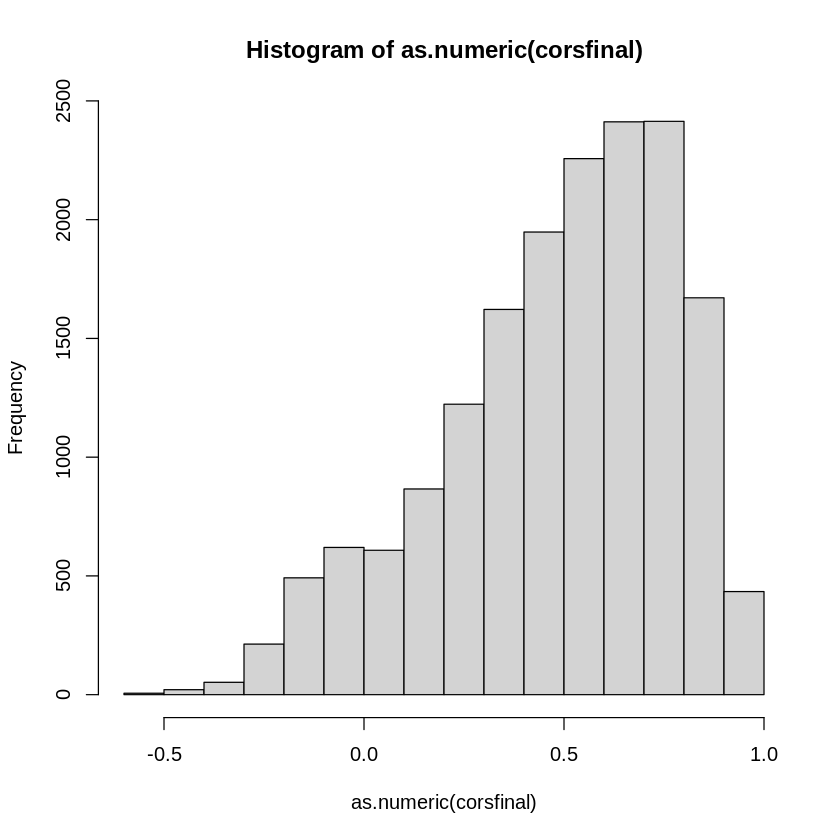

In [ ]:
hist(as.numeric(corsfinal))

### Распеределение

In [ ]:
data_num_RPF <- data_num[, grepl('RPF',names(data_num))]

In [ ]:
vars <- list()
means <- list()

for(i in 1:nrow(data_num_RPF)) {      
  # result_var <- log(var(as.numeric(data_num_RPF[i, ])))
  # result_mean <- log(mean(as.numeric(data_num_RPF[i, ])))
  result_var <- var(as.numeric(data_num_RPF[i, ]))
  result_mean <- mean(as.numeric(data_num_RPF[i, ]))
  
  vars <- append(vars, result_var)
  means <- append(means, result_mean)
}

In [ ]:
x <- seq(0, 40, length.out=100)
y <- x + x**2 # mu + 1 / phi mu^2

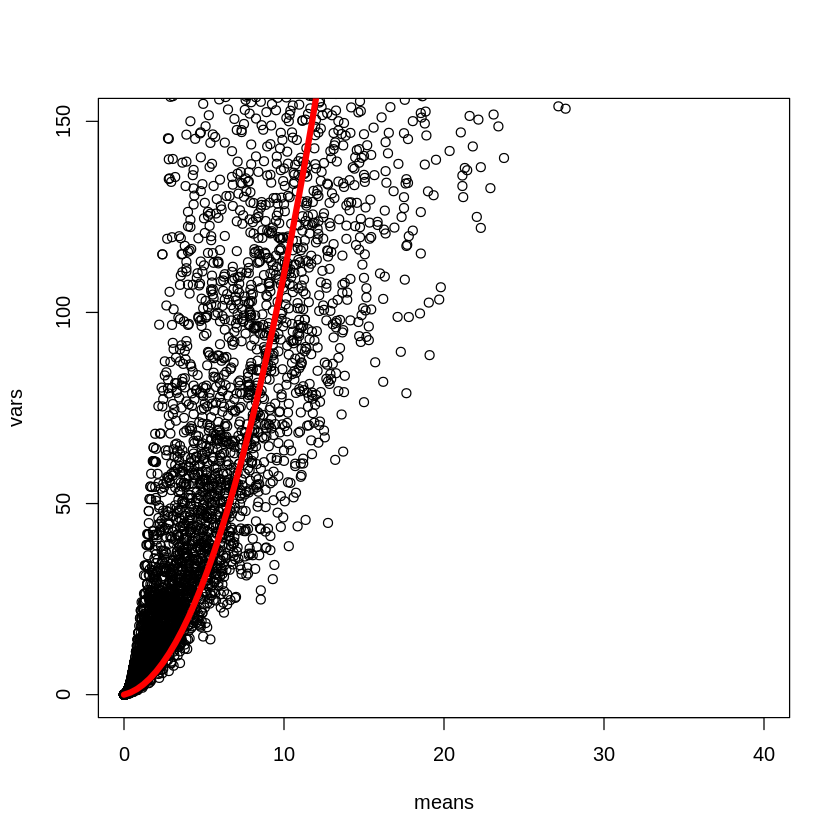

In [ ]:
plot(means, vars, xlim=range(0:40), ylim=range(0:150))
lines(x, y, col='red', lwd=5)

In [ ]:
ks.test(unlist(means), unlist(as.numeric(vars)))

Warning message in ks.test.default(unlist(means), unlist(as.numeric(vars))):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  unlist(means) and unlist(as.numeric(vars))
D = 0.45337, p-value < 2.2e-16
alternative hypothesis: two-sided


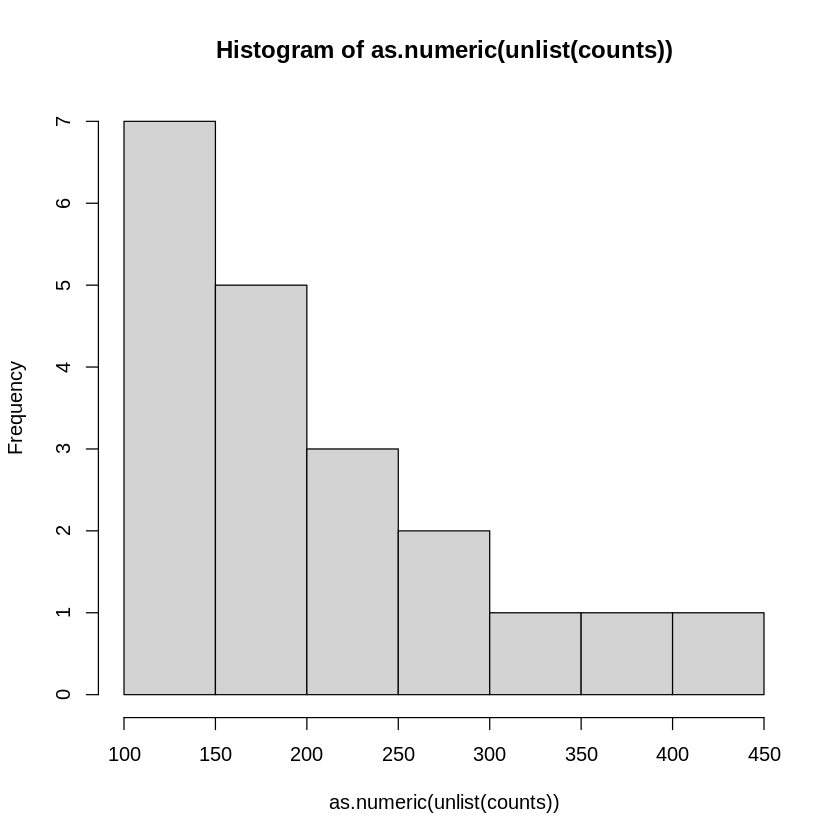

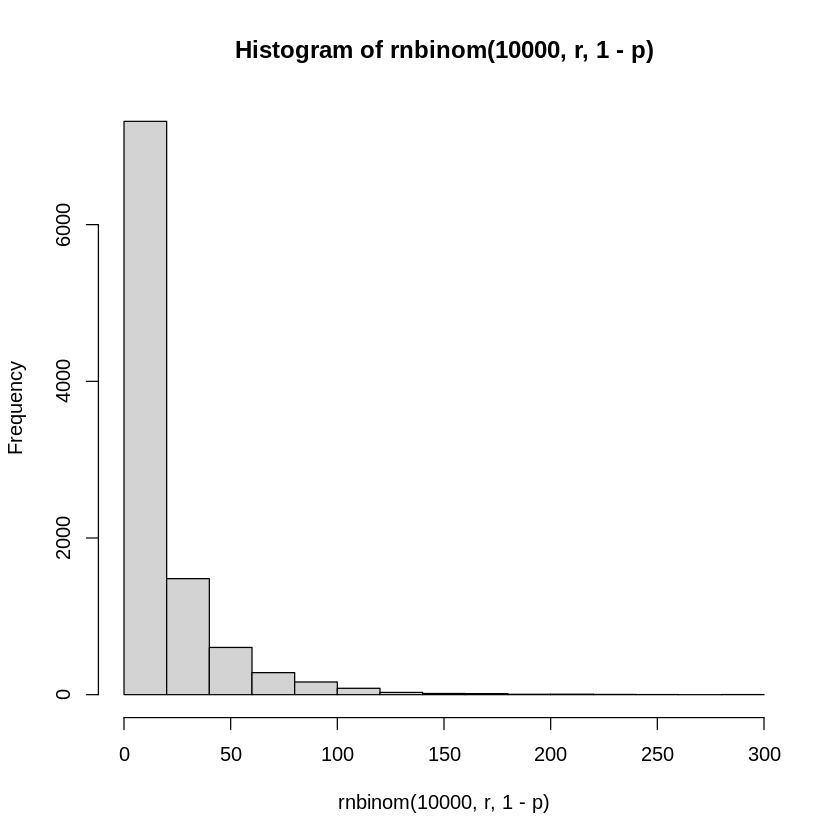

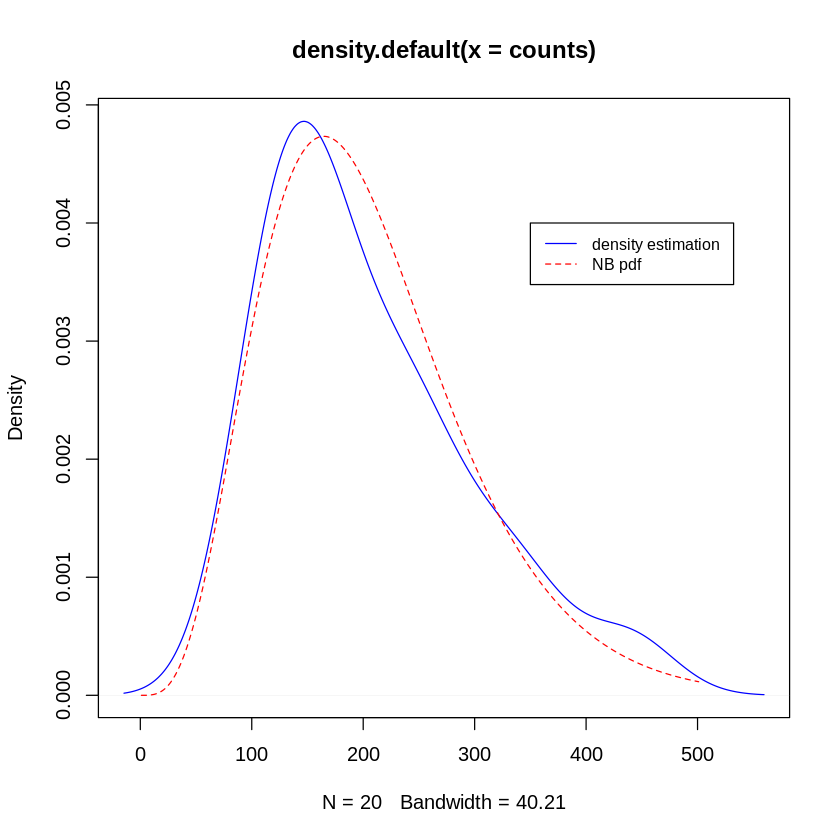

In [ ]:
counts <- as.numeric(data_num_RPF[3,])#[(data_num_RPF[3,] < 100)]
mean_c <- as.numeric(mean(counts))
var_c <- as.numeric(var(counts))

hist(as.numeric(unlist(counts)))

hist(rnbinom(10000, r, 1-p))

r <- mean_c ** 2 / (var_c - mean_c)
p <- 1 - mean_c / var_c

d <- density(counts) 
plot(d, col='blue')
x <- 0:500
lines(dnbinom(x, size=r, prob=1-p), col='red', lty=2)
legend(350, 0.004, legend=c('density estimation', 'NB pdf'), col=c('blue', 'red'), lty=1:2, cex=0.8)




Похоже на NB распределение

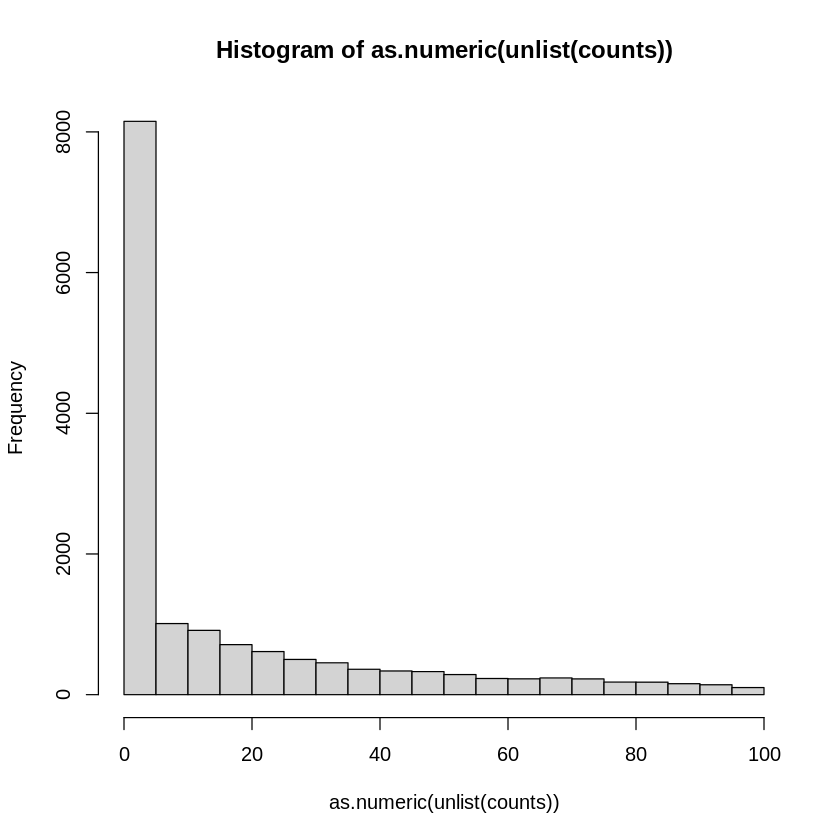

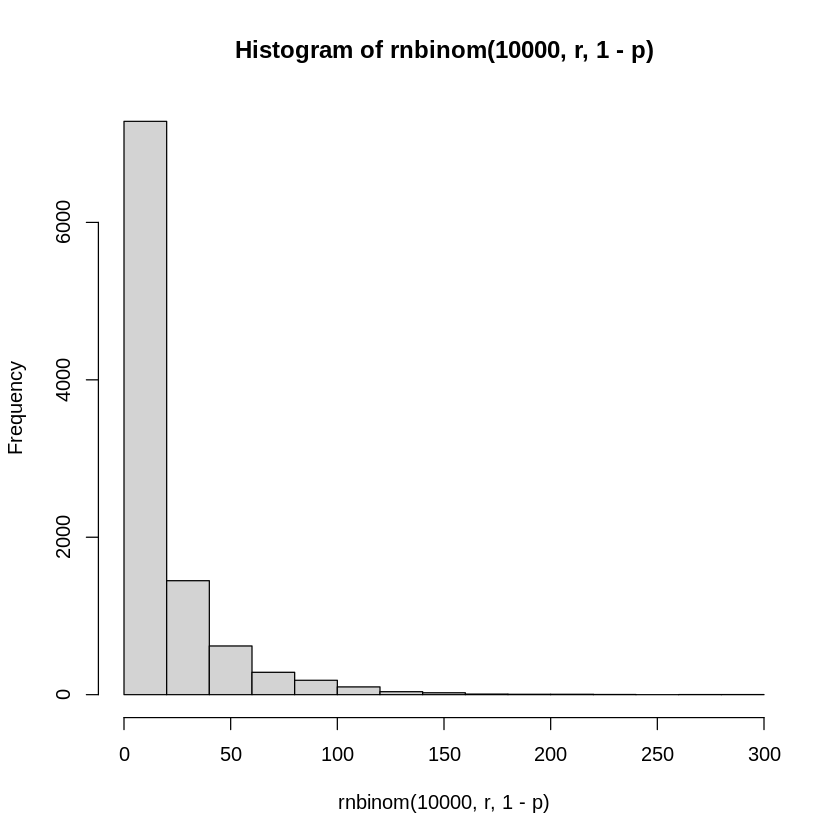

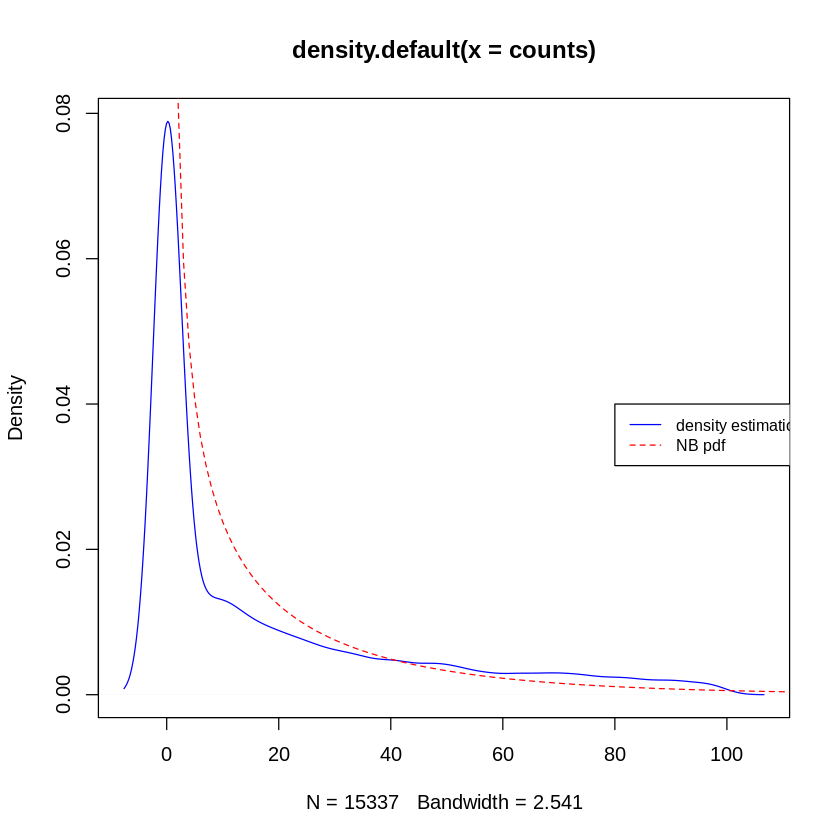

In [ ]:
counts <- as.numeric(unlist(data_num_RPF[3][(data_num_RPF[3] < 100)]))
mean_c <- as.numeric(mean(counts))
var_c <- as.numeric(var(counts))

hist(as.numeric(unlist(counts)))


r <- mean_c ** 2 / (var_c - mean_c)
p <- 1 - mean_c / var_c

hist(rnbinom(10000, r, 1-p))


d <- density(counts) 
plot(d, col='blue')
x <- 0:500
lines(dnbinom(x, size=r, prob=1-p), col='red', lty=2)
legend(80, 0.04, legend=c('density estimation', 'NB pdf'), col=c('blue', 'red'), lty=1:2, cex=0.8)



In [ ]:
ks.test(counts, rnbinom(10000, r, 1-p))

Warning message in ks.test.default(counts, rnbinom(10000, r, 1 - p)):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  counts and rnbinom(10000, r, 1 - p)
D = 0.28058, p-value < 2.2e-16
alternative hypothesis: two-sided


In [ ]:
head(data_num)

,LC001.normal.RPF,LC001.tumor.RPF,LC001.normal.RNA,LC001.tumor.RNA,LC033.normal.RPF,LC033.tumor.RPF,LC033.normal.RNA,LC033.tumor.RNA,LC034.normal.RPF,LC034.tumor.RPF,⋯,LC507.normal.RNA,LC507.tumor.RNA,LC508.normal.RPF,LC508.tumor.RPF,LC508.normal.RNA,LC508.tumor.RNA,LC509.normal.RPF,LC509.tumor.RPF,LC509.normal.RNA,LC509.tumor.RNA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,402,873,0,0,301,1627,0,0,⋯,218,457,0,0,200,889,0,0,161,857
2,0,0,0,1,0,0,0,1,0,0,⋯,0,0,1,0,0,0,0,0,0,0
3,168,239,88,187,114,439,66,201,325,117,⋯,92,170,109,357,60,244,141,173,56,83
4,65,121,60,106,36,163,70,156,130,76,⋯,127,176,67,176,55,261,64,100,68,176
5,8,43,18,70,16,76,4,63,44,14,⋯,124,437,7,167,34,201,6,61,9,58
6,0,6,19,9,14,13,61,24,15,62,⋯,94,13,3,9,42,26,7,10,26,57


In [ ]:
tissue <- list()
experiments <- list()
for (name in colnames(data_num)) {
    tissue <- append(tissue, strsplit(name, '\\.')[[1]][2])
    experiments <- append(experiments, strsplit(name, '\\.')[[1]][3])
}

In [ ]:
design_matrix <- data.frame(row.names = colnames(data_num))
design_matrix$condition = tissue
design_matrix$experiment = experiments
design_matrix <- data.frame(sapply(design_matrix, as.character))
rownames(design_matrix) <- colnames(data_num)
head(design_matrix)

,condition,experiment
,<chr>,<chr>
LC001.normal.RPF,normal,RPF
LC001.tumor.RPF,tumor,RPF
LC001.normal.RNA,normal,RNA
LC001.tumor.RNA,tumor,RNA
LC033.normal.RPF,normal,RPF
LC033.tumor.RPF,tumor,RPF


In [ ]:
dim(data_num_RPF_copy)

[1] 18945    20

In [ ]:
# Only RPF
data_num_RPF <- data_num[, grepl('RPF',names(data_num))]
design_matrix_RPF <- design_matrix[design_matrix$experiment == 'RPF',]
data_num_RPF_copy <- data_num_RPF

data_num_RPF_copy <- sapply(data_num_RPF_copy, as.numeric)
dds <- DESeqDataSetFromMatrix(countData = data_num_RPF_copy, colData = design_matrix_RPF, design = ~ condition)
dds <- DESeq(dds)
res <- results(dds)

rownames(res) <- data_labels$geneSymbol

print(head(res[order(res$padj),], 10))

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 888 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



log2 fold change (MLE): condition tumor vs normal 
Wald test p-value: condition tumor vs normal 
DataFrame with 10 rows and 6 columns
        baseMean log2FoldChange     lfcSE      stat      pvalue        padj
       <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
CETP    234.7062       -3.66117  0.328144 -11.15720 6.60353e-29 9.21985e-25
OIT3    378.5271       -4.12394  0.384101 -10.73662 6.85082e-27 4.78256e-23
TIMD4   115.8233       -4.41043  0.424721 -10.38429 2.92334e-25 1.36052e-21
ADGRA3  351.2721       -3.78914  0.368147 -10.29247 7.61938e-25 2.65955e-21
CLEC4M   60.0256       -6.01915  0.589470 -10.21111 1.76826e-24 4.93770e-21
CRHBP   407.1053       -4.46670  0.441431 -10.11868 4.56532e-24 1.06235e-20
IGF1    105.1094       -4.53545  0.463041  -9.79491 1.18400e-22 2.36158e-19
APOF   2095.2486       -4.35820  0.447211  -9.74529 1.93234e-22 3.37241e-19
LYVE1   237.6750       -3.36384  0.347208  -9.68827 3.38195e-22 5.24653e-19
HAO2    435.4160       -4.0835

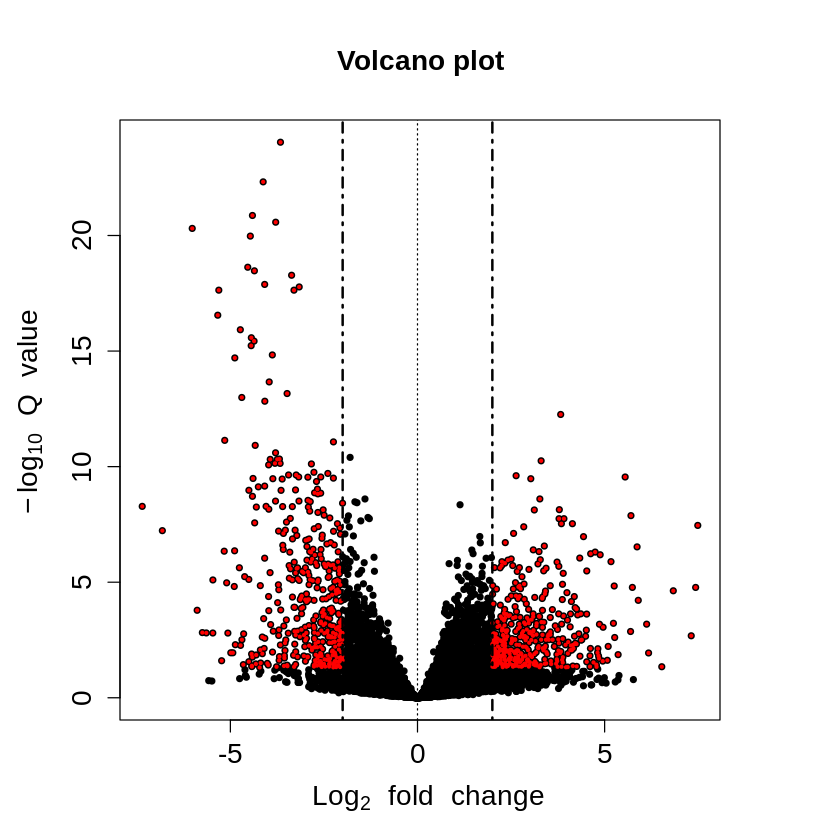

In [ ]:
# Volcano plot RPF
par(mar=c(5,5,5,5), cex=1.0, cex.main=1.4, cex.axis=1.4, cex.lab=1.4)

topT <- as.data.frame(res)

with(topT, plot(log2FoldChange, -log10(padj), pch=20, main="Volcano plot", cex=1.0, xlab=bquote(~Log[2]~fold~change), ylab=bquote(~-log[10]~Q~value)))

with(subset(topT, padj<0.05 & abs(log2FoldChange)>2), points(log2FoldChange, -log10(padj), pch=20, col="red", cex=0.5))

abline(v=0, col="black", lty=3, lwd=1.0)
abline(v=-2, col="black", lty=4, lwd=2.0)
abline(v=2, col="black", lty=4, lwd=2.0)


converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 1242 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



log2 fold change (MLE): condition tumor vs normal 
Wald test p-value: condition tumor vs normal 
DataFrame with 10 rows and 6 columns
          baseMean log2FoldChange     lfcSE      stat      pvalue        padj
         <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
CLEC4G    187.9025       -6.22429  0.471543  -13.1998 8.79197e-40 1.46448e-35
OIT3      207.4333       -4.19014  0.372389  -11.2521 2.26259e-29 1.88440e-25
INS-IGF2  517.4663       -5.94190  0.547969  -10.8435 2.14135e-27 8.91713e-24
AVPR1A    216.7852       -4.83603  0.444956  -10.8686 1.62765e-27 8.91713e-24
FCN2      154.1703       -5.70099  0.527201  -10.8137 2.96478e-27 9.87686e-24
CFP       132.3102       -3.76828  0.358970  -10.4975 8.87173e-26 2.46294e-22
CLEC4M     83.5253       -5.81046  0.558404  -10.4055 2.34064e-25 5.56971e-22
HAMP     1417.0279       -5.64622  0.551485  -10.2382 1.33686e-24 2.78351e-21
CETP       87.7878       -3.44003  0.337217  -10.2012 1.95744e-24 3.62278e-21
FCN3    

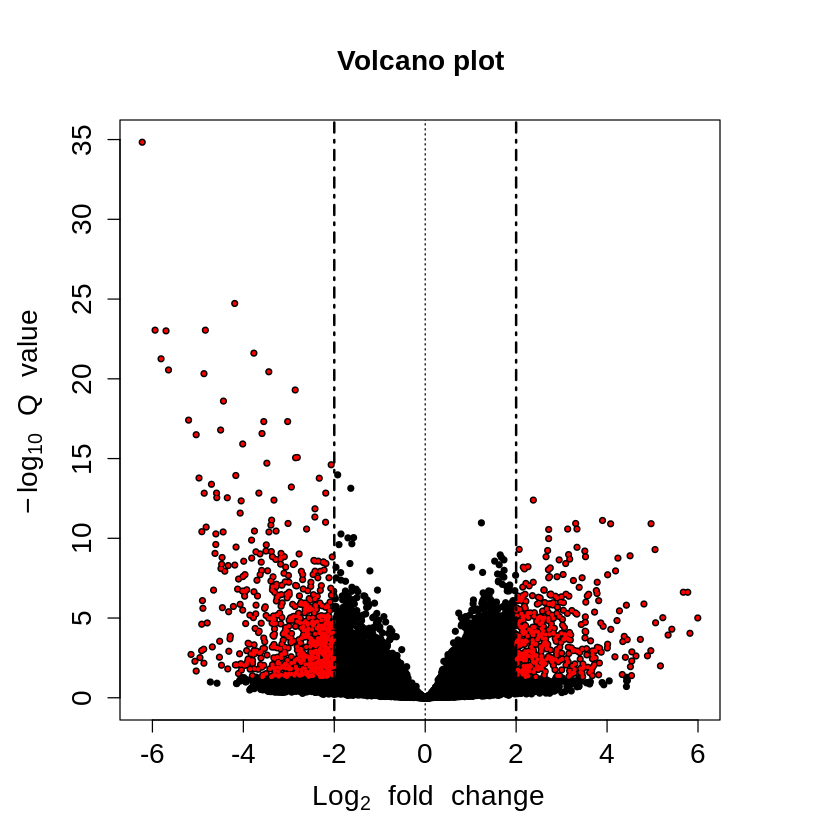

In [ ]:
# Only RNA
data_num_RNA <- data_num[, grepl('RNA',names(data_num))]
design_matrix_RNA <- design_matrix[design_matrix$experiment == 'RNA',]
data_num_RNA_copy <- data_num_RNA

data_num_RNA_copy <- sapply(data_num_RNA_copy, as.numeric)
dds <- DESeqDataSetFromMatrix(countData = data_num_RNA_copy, colData = design_matrix_RNA, design = ~ condition)
dds <- DESeq(dds)
res <- results(dds)

rownames(res) <- data_labels$geneSymbol

print(head(res[order(res$padj),], 10))

# Volcano plot RNA
par(mar=c(5,5,5,5), cex=1.0, cex.main=1.4, cex.axis=1.4, cex.lab=1.4)

topT <- as.data.frame(res)

with(topT, plot(log2FoldChange, -log10(padj), pch=20, main="Volcano plot", cex=1.0, xlab=bquote(~Log[2]~fold~change), ylab=bquote(~-log[10]~Q~value)))

with(subset(topT, padj<0.05 & abs(log2FoldChange)>2), points(log2FoldChange, -log10(padj), pch=20, col="red", cex=0.5))

abline(v=0, col="black", lty=3, lwd=1.0)
abline(v=-2, col="black", lty=4, lwd=2.0)
abline(v=2, col="black", lty=4, lwd=2.0)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 783 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



log2 fold change (MLE): conditiontumor.experimentRPF 
Wald test p-value: conditiontumor.experimentRPF 
DataFrame with 10 rows and 6 columns
             baseMean log2FoldChange     lfcSE      stat      pvalue       padj
            <numeric>      <numeric> <numeric> <numeric>   <numeric>  <numeric>
UAP1        524.93725       -1.85204  0.372283  -4.97481 6.53108e-07 0.00569479
DMXL1       292.35892       -1.24295  0.250249  -4.96685 6.80503e-07 0.00569479
DPP9      19998.72735        2.69984  0.557605   4.84185 1.28633e-06 0.00717643
CDC25A       28.82246        3.89699  0.820834   4.74759 2.05851e-06 0.00861331
KIAA1211L     9.75882        3.93791  0.884599   4.45164 8.52175e-06 0.02852570
AKAP11      340.26250       -1.20571  0.285576  -4.22203 2.42115e-05 0.04324938
GRIN2D       11.36086        5.12969  1.251194   4.09983 4.13449e-05 0.04324938
NKX3-2        5.22660        5.50571  1.295173   4.25094 2.12871e-05 0.04324938
EBNA1BP2    136.35100        1.40265  0.341649   4.10554 4.0

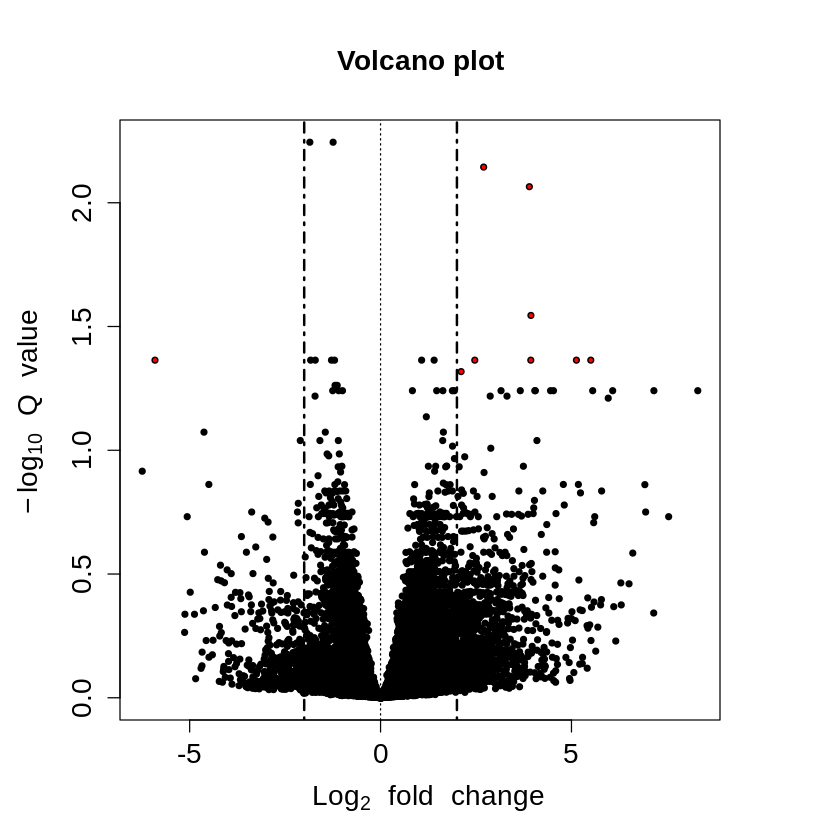

In [ ]:
# All 
data_num_copy <- data_num

data_num_copy <- sapply(data_num_copy, as.numeric)
dds <- DESeqDataSetFromMatrix(countData = data_num_copy, colData = design_matrix, design = ~ condition + experiment + experiment:condition)

dds <- DESeq(dds)
res <- results(dds)

rownames(res) <- data_labels$geneSymbol

print(head(res[order(res$padj),], 10))

# Volcano plot RNA
par(mar=c(5,5,5,5), cex=1.0, cex.main=1.4, cex.axis=1.4, cex.lab=1.4)

topT <- as.data.frame(res)

with(topT, plot(log2FoldChange, -log10(padj), pch=20, main="Volcano plot", cex=1.0, xlab=bquote(~Log[2]~fold~change), ylab=bquote(~-log[10]~Q~value)))

with(subset(topT, padj<0.05 & abs(log2FoldChange)>2), points(log2FoldChange, -log10(padj), pch=20, col="red", cex=0.5))

abline(v=0, col="black", lty=3, lwd=1.0)
abline(v=-2, col="black", lty=4, lwd=2.0)
abline(v=2, col="black", lty=4, lwd=2.0)